In [ ]:
!pip install pytesseract

In [ ]:
from PIL import Image
import pytesseract
import numpy as np

In [ ]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (12.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [ ]:
!sudo apt-get install tesseract-ocr-eng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-eng is already the newest version (1:4.00~git30-7274cfa-1.1).
tesseract-ocr-eng set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
filename = 'ocr1.png'
img1 = np.array(Image.open(filename))
text = pytesseract.image_to_string(img1)

In [ ]:
print(text)

Tesseract sample



In [ ]:
filenamee = 'ocr1noise.png'
img2 = np.array(Image.open(filenamee))
textt = pytesseract.image_to_string(img2)
print(textt)

Tesseract sample



In [ ]:
import cv2
import numpy as np

img = cv2.imread('ocr1noise.png')

# Create an empty array for normalization
norm_img = np.zeros((img.shape[0], img.shape[1]))

# Normalize the image and store the result in norm_img
cv2.normalize(img, norm_img, 0, 255, cv2.NORM_MINMAX)

# Threshold the normalized image
img = cv2.threshold(norm_img, 100, 255, cv2.THRESH_BINARY)[1]

# Apply Gaussian Blur
img = cv2.GaussianBlur(img, (1, 1), 0)

In [ ]:
filenamee = 'good3.png'
img2 = np.array(Image.open(filenamee))
textt = pytesseract.image_to_string(img2)
print(textt)

good



In [ ]:
from pytesseract import Output
import pytesseract
import cv2

In [ ]:
filename = 'ocr1.png'
image = cv2.imread(filename)

In [ ]:
results = pytesseract.image_to_data(image,
output_type=Output.DICT)


In [ ]:
{
#'level': [1, 2, 3, 4, 5, 5, 5],
#'page_num': [1, 1, 1, 1, 1, 1, 1],
#'block_num': [0, 1, 1, 1, 1, 1, 1],
#'par_num': [0, 0, 1, 1, 1, 1, 1],
#'line_num': [0, 0, 0, 1, 1, 1, 1],
#'word_num': [0, 0, 0, 0, 1, 2, 3],
'left': [0, 26, 26, 26, 26, 110, 216],
'top': [0, 63, 63, 63, 63, 63, 63],
'width': [300, 249, 249, 249, 77, 100, 59],
'height': [150, 25, 25, 25, 25, 19, 19],
'conf': ['-1', '-1', '-1', '-1', 97, 96, 96],
'text': ['', '', '', '', 'Testing', 'Tesseract', 'OCR']
}

{'left': [0, 26, 26, 26, 26, 110, 216],
 'top': [0, 63, 63, 63, 63, 63, 63],
 'width': [300, 249, 249, 249, 77, 100, 59],
 'height': [150, 25, 25, 25, 25, 19, 19],
 'conf': ['-1', '-1', '-1', '-1', 97, 96, 96],
 'text': ['', '', '', '', 'Testing', 'Tesseract', 'OCR']}

In [ ]:
for i in range(0, len(results["text"])):
   x = results["left"][i]
   y = results["top"][i]

   w = results["width"][i]
   h = results["height"][i]

   text = results["text"][i]
   conf = int(results["conf"][i])

   if conf > 70:
       text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
       cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
       cv2.putText(image, text, (x, y - 10),
cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 200), 2)

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
from matplotlib import pyplot as plt

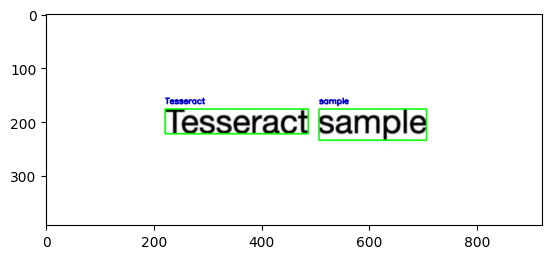

In [ ]:
plt.imshow(image)